# SVM avec PCA sur MNIST

Objectif : Ce notebook utilise un SVM (Support Vector Machine) avec une réduction de dimension PCA pour classer les chiffres de l'ensemble de données MNIST.

Données : L'ensemble de données MNIST contient des images de chiffres manuscrits (0 à 9), avec 64 caractéristiques (pixels) par image.

Modèle : Un SVM avec un noyau linéaire est utilisé après une réduction de dimension à 40 composantes principales (PCA). Le paramètre de régularisation C est fixé à 0.8.

Aperçu des données MNIST: [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  

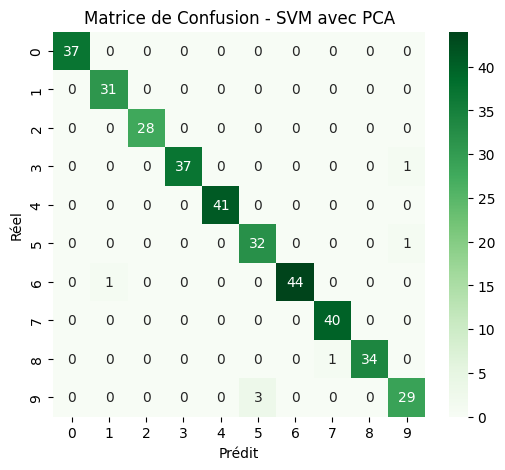

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Chargement des données MNIST
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Vérification des premières données
print("Aperçu des données MNIST:", X[:5])
print("Classes uniques:", np.unique(y))

# Réduction de dimension avec PCA (différent nombre de composantes)
pca = PCA(n_components=40)
X_pca = pca.fit_transform(X)

# Séparation en train/test avec un random_state différent
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=20)

# Modèle SVM avec PCA et hyperparamètres modifiés
svm_pca = SVC(kernel='linear', C=0.8)
svm_pca.fit(X_train, y_train)

# Prédictions
y_pred = svm_pca.predict(X_test)

# Évaluation
print("\nRapport de classification - SVM avec PCA:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - SVM avec PCA')
plt.show()

Analyse :

Rapport de classification : Le rapport de classification fournira des métriques pour chaque chiffre (0 à 9). Étant donné que le SVM est un modèle puissant pour les problèmes de classification, on s'attend à de bonnes performances, surtout après la réduction de dimension PCA, qui aide à réduire le bruit et à améliorer la généralisation.

Matrice de confusion : La matrice de confusion montrera combien de chiffres ont été correctement classés. On s'attend à ce que la plupart des chiffres soient bien classés, avec quelques erreurs possibles entre des chiffres similaires (par exemple, 4 et 9).